In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import font_manager, rc

dir_path = "/home/oks/oks/data/intent_oks/korean"
data_list = ['A_food.json', 'B_clothes.json', 'C_academy.json', 'F_cafe.json', 'G_accomodation.json', 'J_passport.json', 'J_car_register.json', 'traffic.json']

In [2]:
# F_cafe_list = ['F_cafe_call.json', 'F_cafe_needs.json', 'F_cafe_order.json']

# cafe_merge_data = {}

# for file_name in F_cafe_list:
#     file_path = os.path.join(dir_path, file_name)
    
#     with open(file_path, 'r', encoding='utf-8') as file:
#         data = json.load(file)
#         print(f"{file_name}의 데이터 수 : {len(data)}")
        
#         # 기존 데이터를 업데이트
#         start_index = len(cafe_merge_data)
#         cafe_merge_data.update({str(start_index + i): value for i, value in enumerate(data.values())})

# total_data_count = len(cafe_merge_data)
# print(f"Total data count: {total_data_count}")

# output_dir = os.path.join("/home/oks/oks/data/intent_oks/korean", 'split_data')
# os.makedirs(output_dir, exist_ok=True)

# with open(os.path.join(output_dir, 'F_cafe.json'), 'w', encoding='utf-8') as train_file:
#     json.dump(cafe_merge_data, train_file, ensure_ascii=False, indent=4)

In [3]:
# J_data_list = ['Car_register_tag.json']

# J_merge_data = {}

# def replace_entities(data):
#     for key, value in data.items():
#         slot_mapping = value['slot_mapping']
#         for entry in slot_mapping:
#             entity = entry['entity']
#             if entity.startswith('B-'):
#                 entry['entity'] = 'B_' + entity[2:]
#             elif entity.startswith('I-'):
#                 entry['entity'] = 'I_' + entity[2:]

# for file_name in J_data_list:
#     file_path = os.path.join(dir_path, file_name)
    
#     with open(file_path, 'r', encoding='utf-8-sig') as file:
#         data = json.load(file)

#         print(f"{file_name}의 데이터 수 : {len(data)}")
        
#         # 기존 데이터를 업데이트
#         start_index = len(J_merge_data)
#         J_merge_data.update({str(start_index + i): value for i, value in enumerate(data)})

# total_data_count = len(J_merge_data)
# # print(f"Total data count: {total_data_count}")

# for key, value in J_merge_data.items():
#     value['slot_out'] = value['slot_out'].replace("B-", "B_")
#     value['slot_out'] = value['slot_out'].replace("I-", "I_")
#         # print(value['slot_out'])

# replace_entities(J_merge_data)

# output_dir = os.path.join("/home/oks/oks/data/intent_oks/", 'korean')
# os.makedirs(output_dir, exist_ok=True)

# with open(os.path.join(output_dir, 'J_car_register.json'), 'w', encoding='utf-8') as train_file:
#     json.dump(J_merge_data, train_file, ensure_ascii=False, indent=4)

In [4]:

def data_load(file_name):
    dir_path = "/home/oks/oks/data/intent_oks/korean"
    file_path = os.path.join(dir_path, file_name)
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data.values()

def plot_intent_distribution(total_intent, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'):
    """
    Parameters:
    - total_intent
    Returns:
    - plot
    """
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

    intent_counts = Counter(total_intent)
    intents, counts = zip(*intent_counts.most_common())

    plt.figure(figsize=(10, 6))
    bars = plt.barh(intents, counts, color='skyblue')

    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Intent', fontsize=14)
    plt.title('Intent Frequency', fontsize=16)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()
    
def plot_slot_distribution(total_slot, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'):
    """
    Parameters:
    - total_slot
    Returns:
    - plot
    """
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

    slot_counts = Counter(total_slot)
    slots, counts = zip(*slot_counts.most_common())

    plt.figure(figsize=(15, 12))
    bars = plt.barh(slots, counts, color='skyblue')

    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Slot', fontsize=8)
    plt.title('Slot Frequency', fontsize=13)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()

In [5]:
def data_eda(file_name):
    data = data_load(file_name)

    total_intent = []
    total_slot_out = []

    for idx in data:
        intent = idx['intent']
        slot_out = idx['slot_out']
        total_intent.append(intent)
        total_slot_out.extend(slot_out.split(" "))

    plot_intent_distribution(total_intent, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
    plot_slot_distribution(total_slot_out, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')


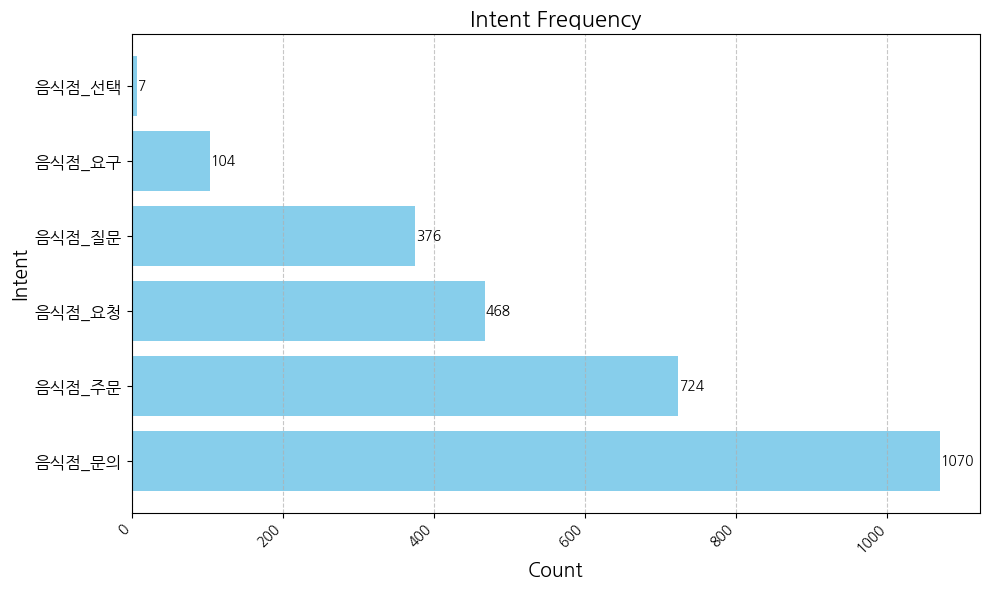

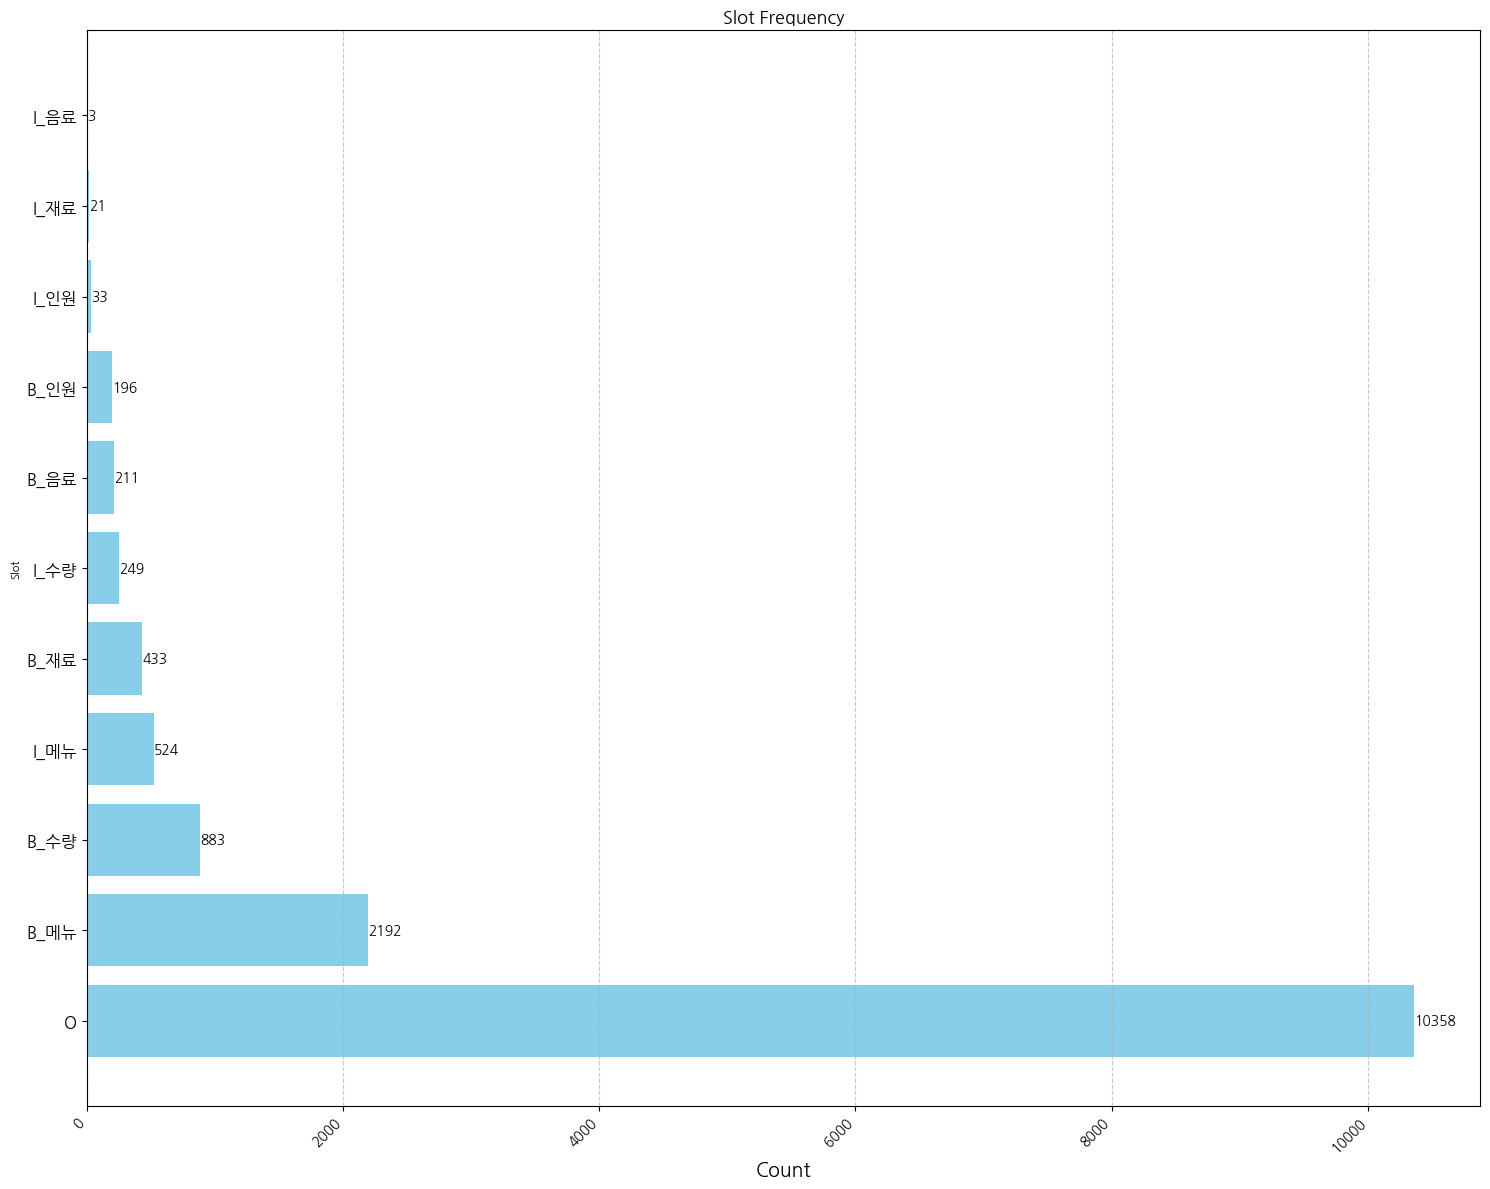

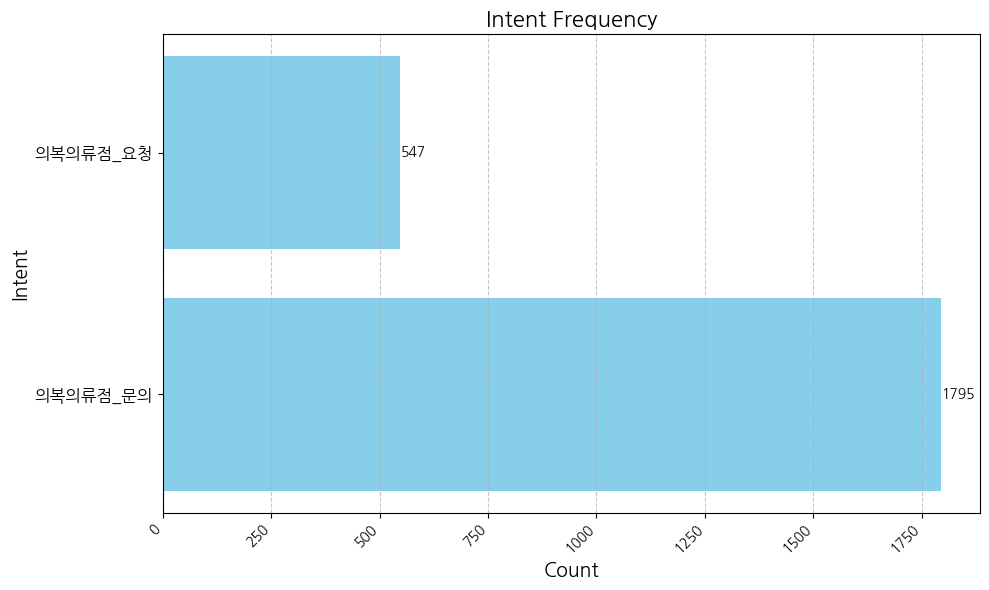

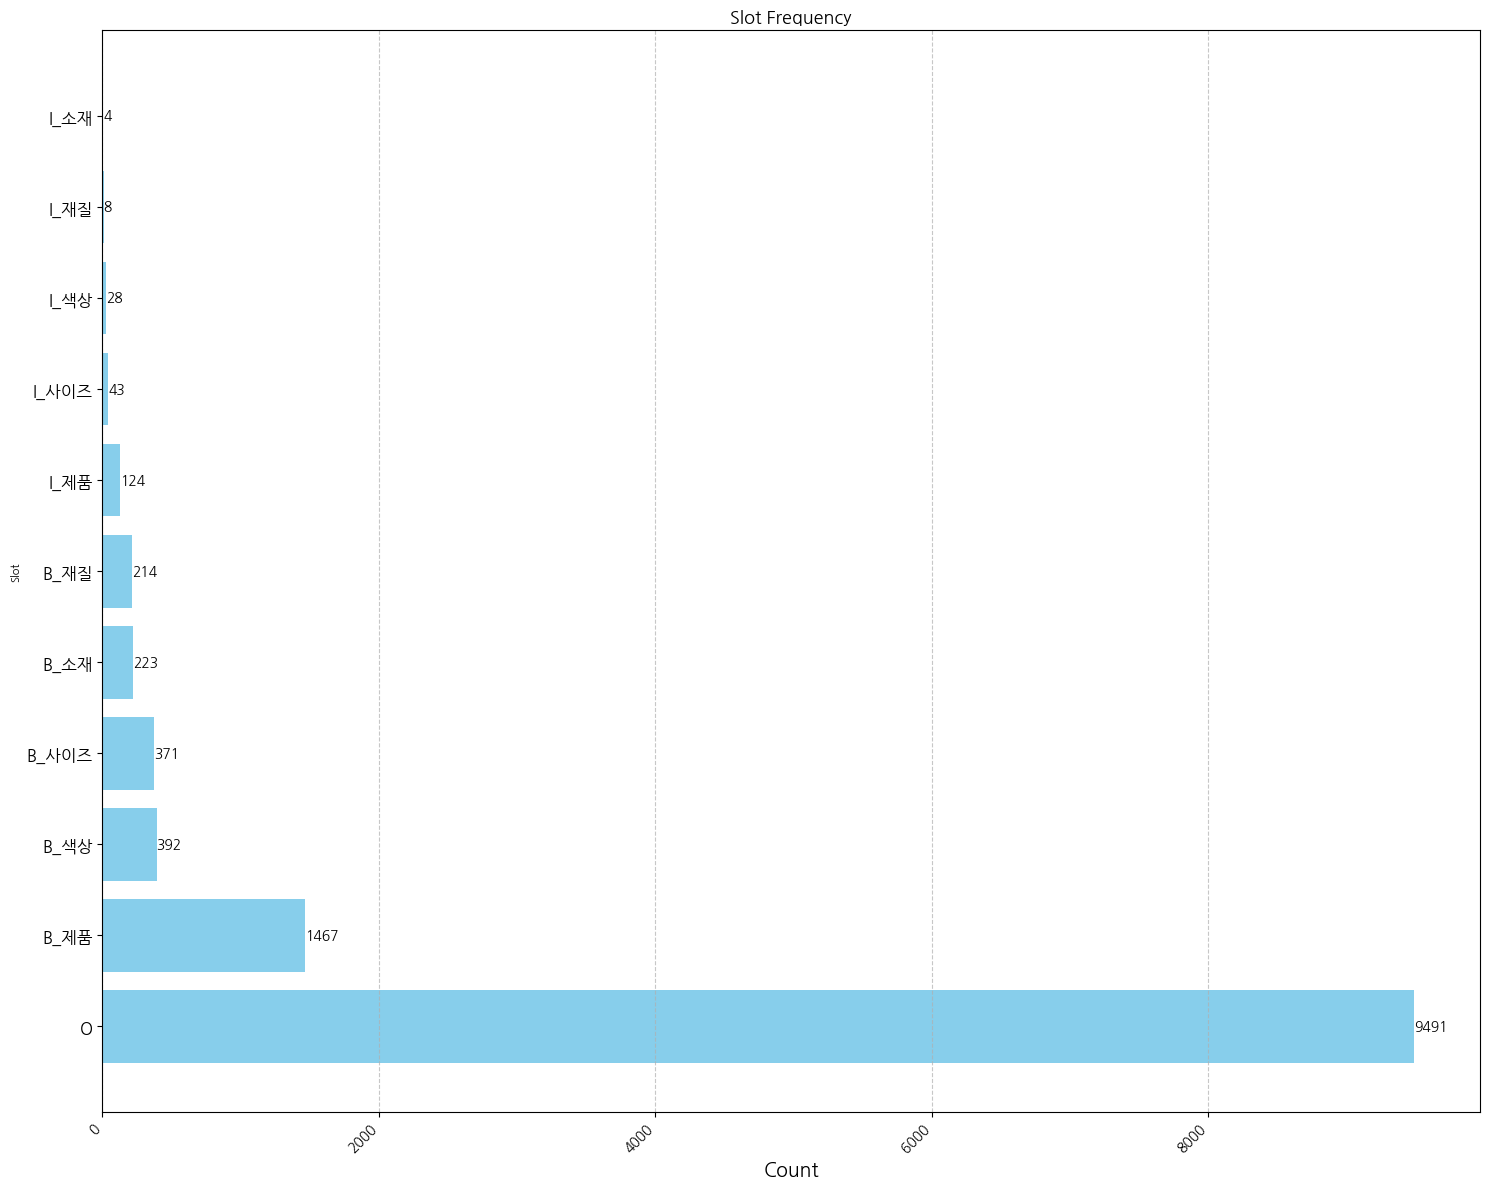

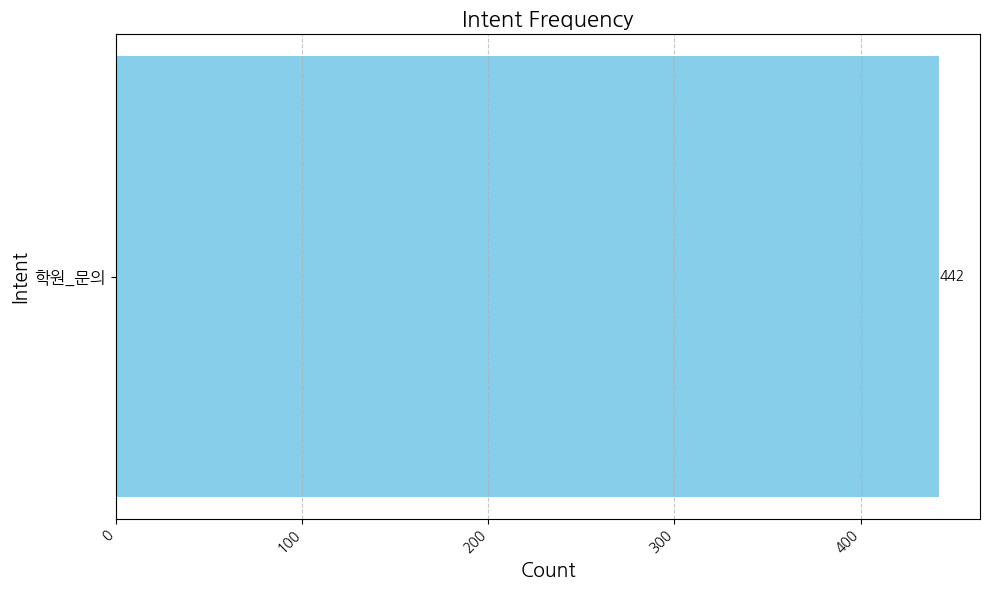

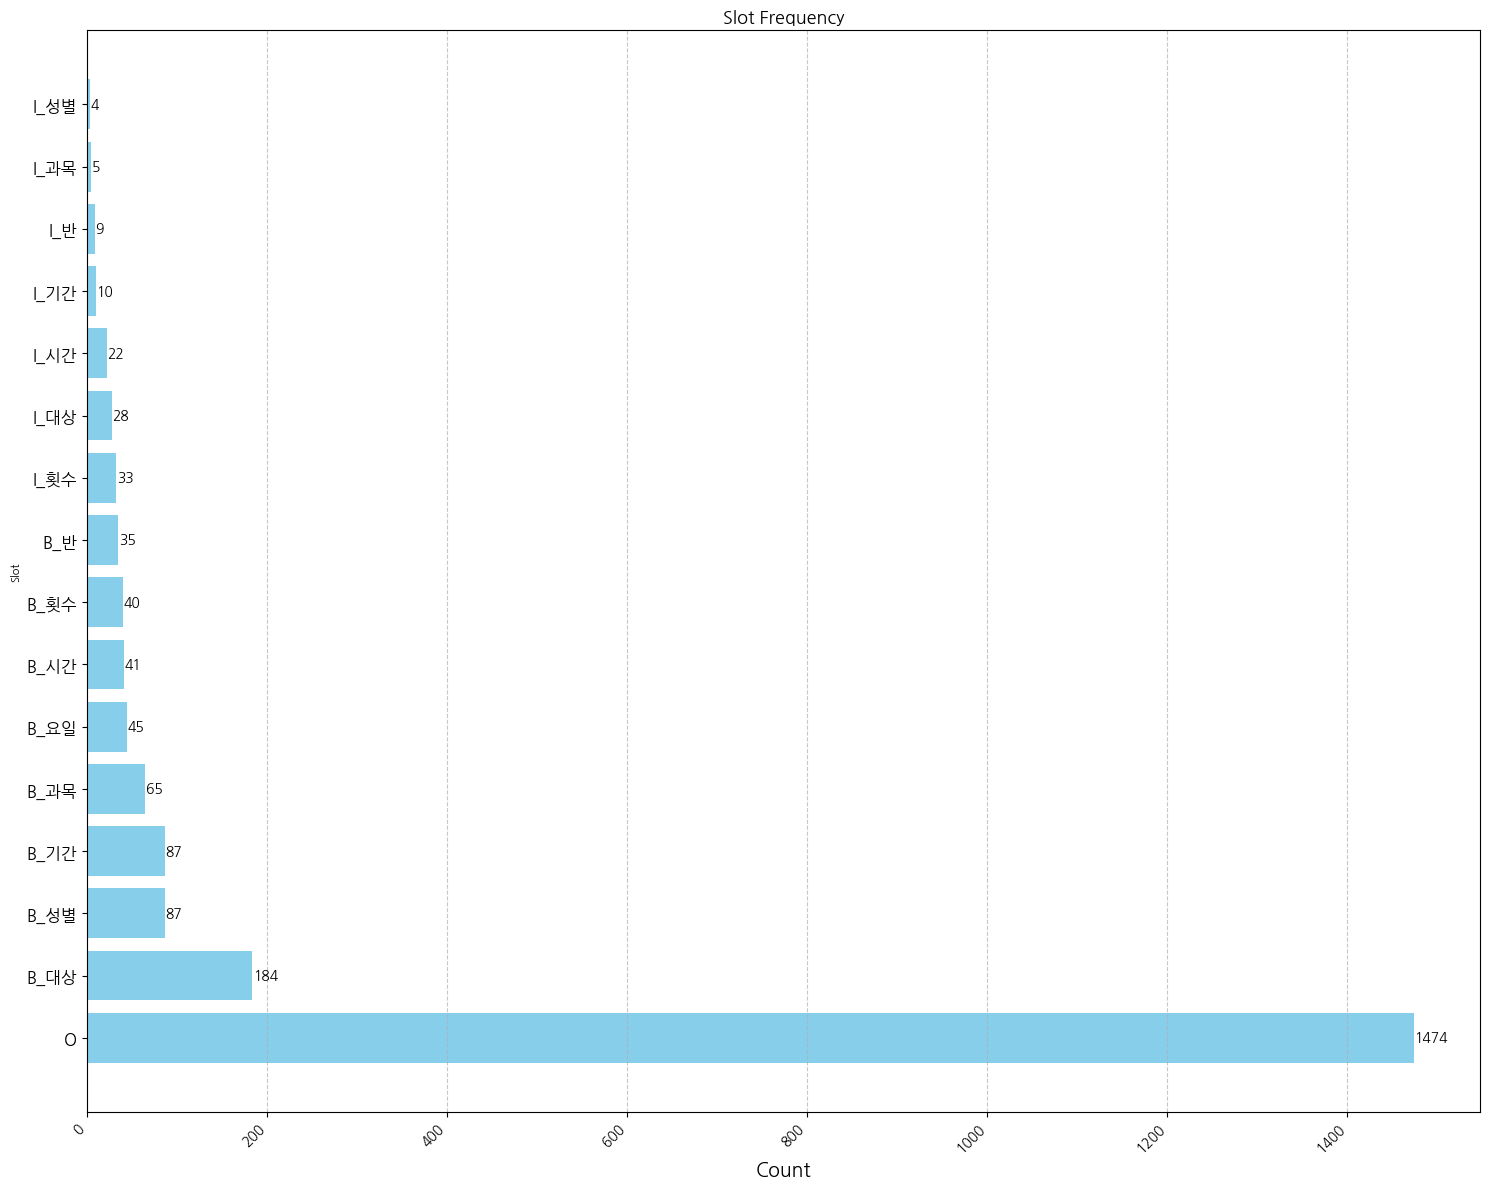

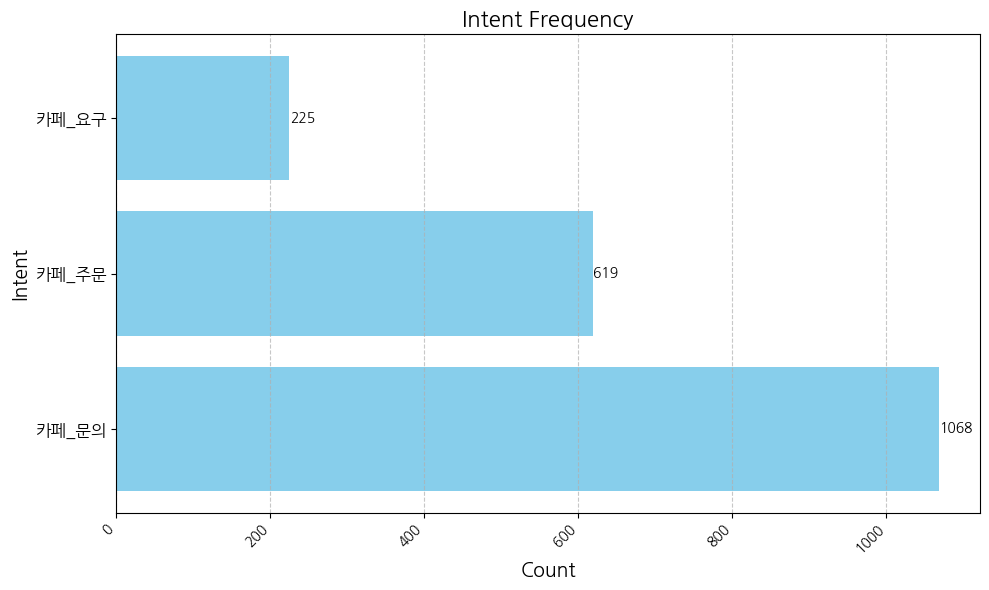

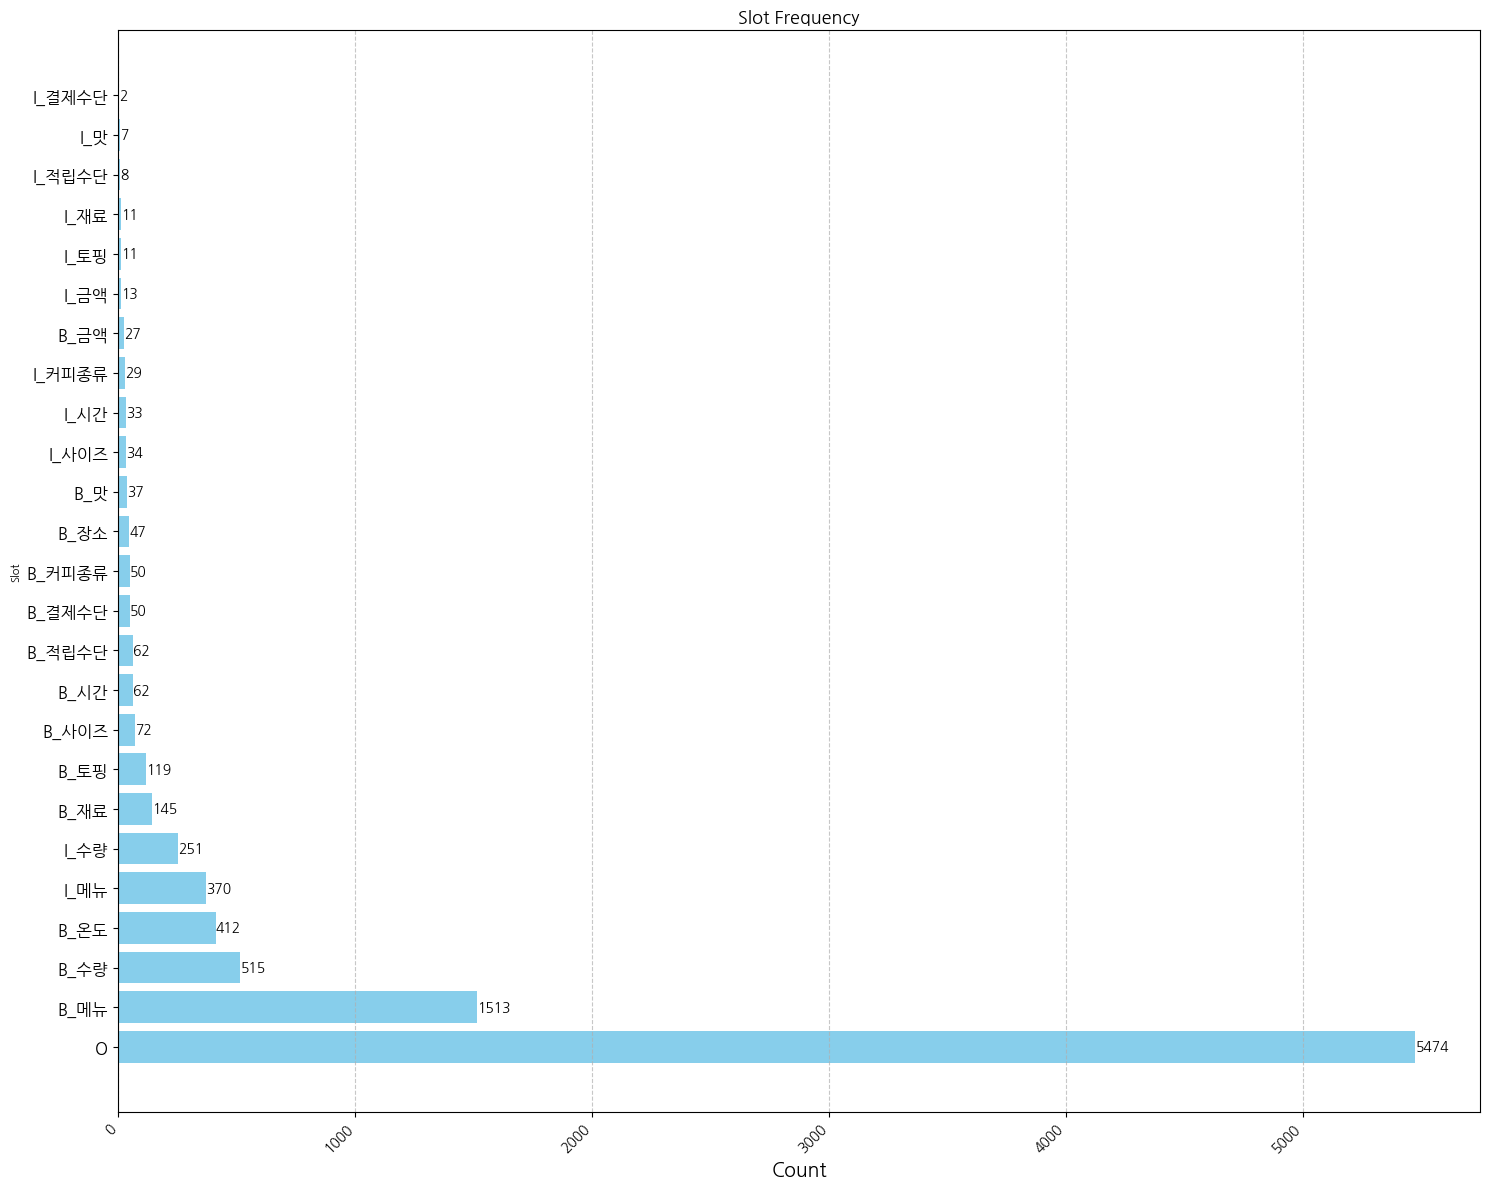

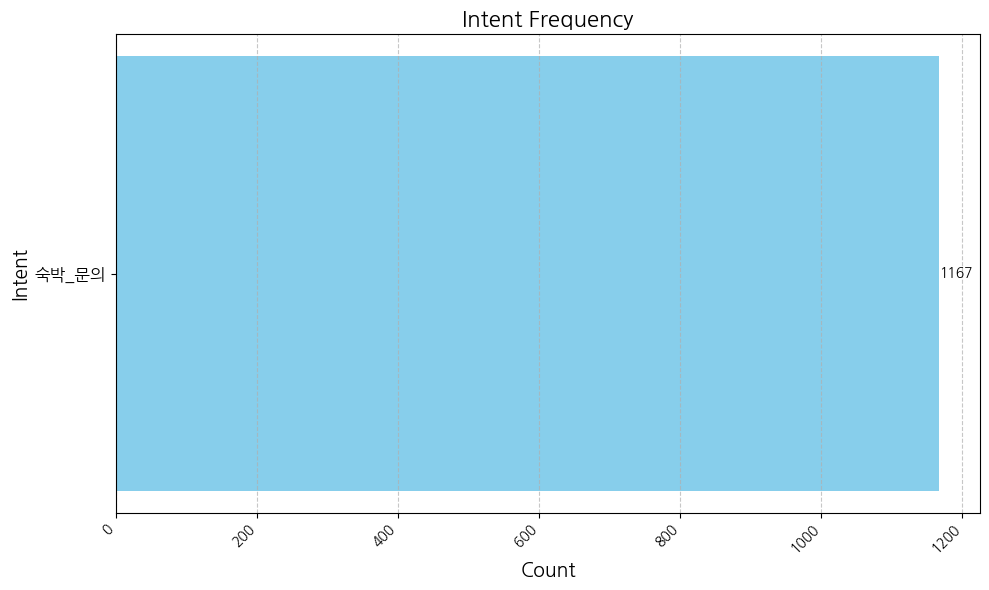

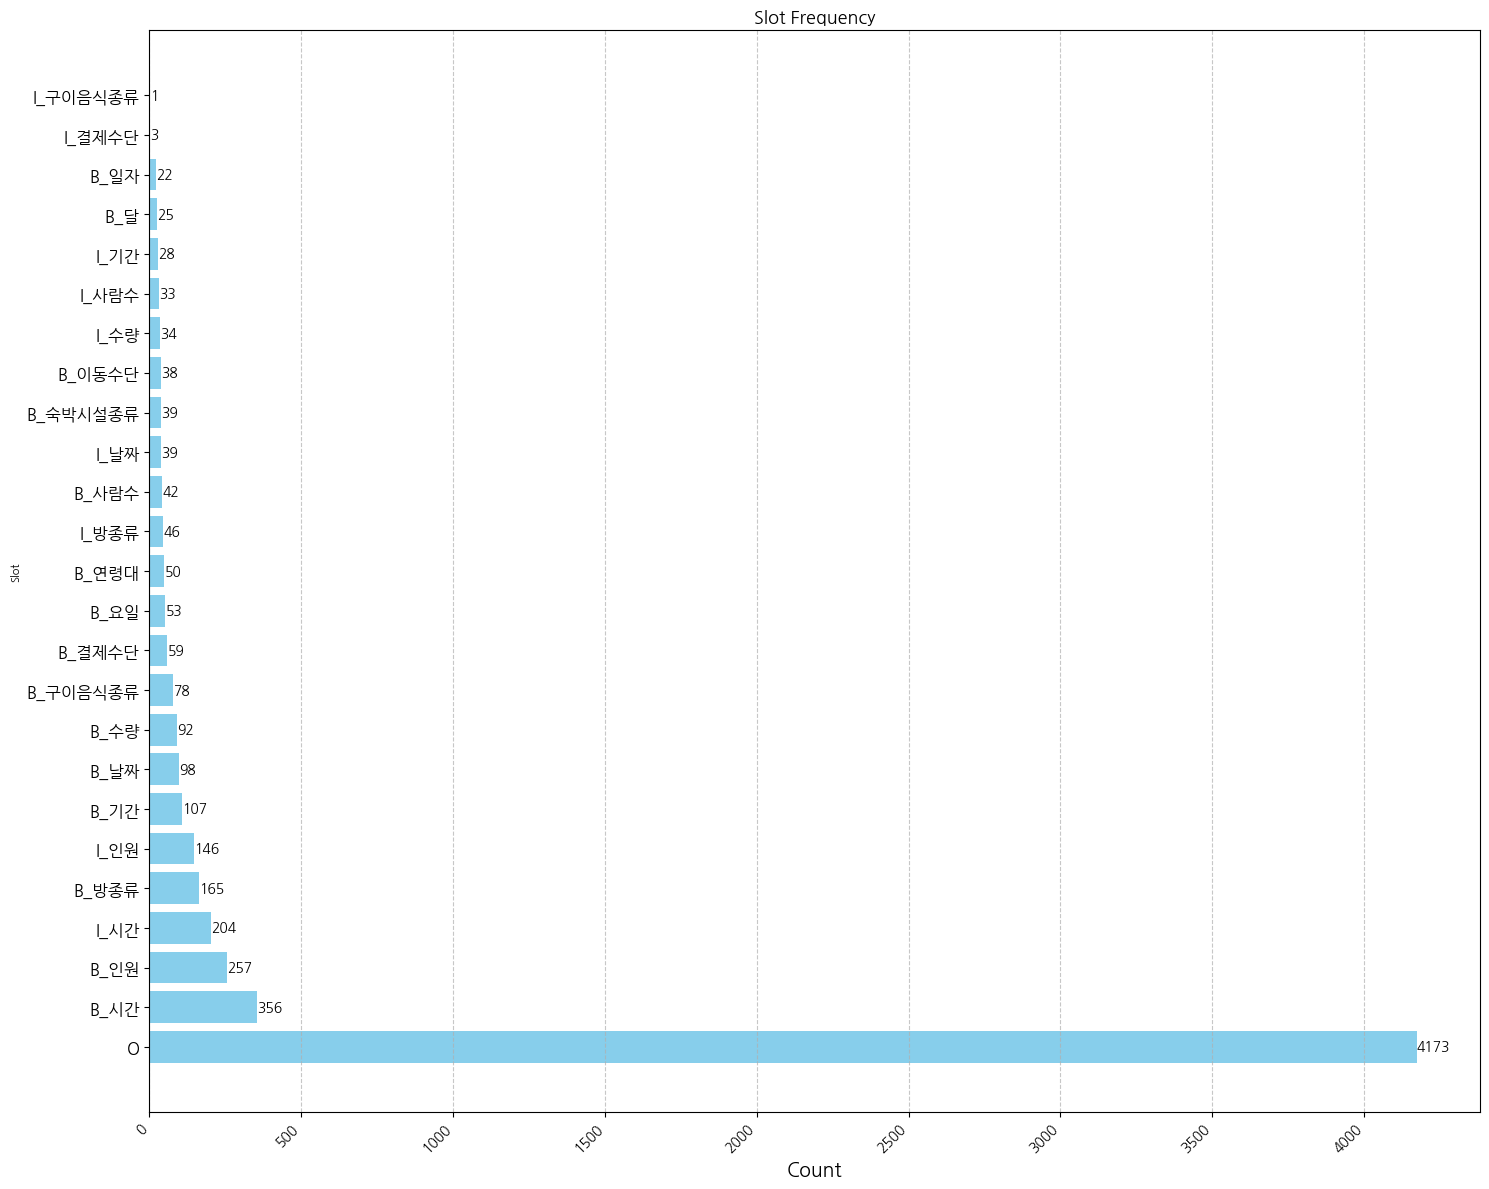

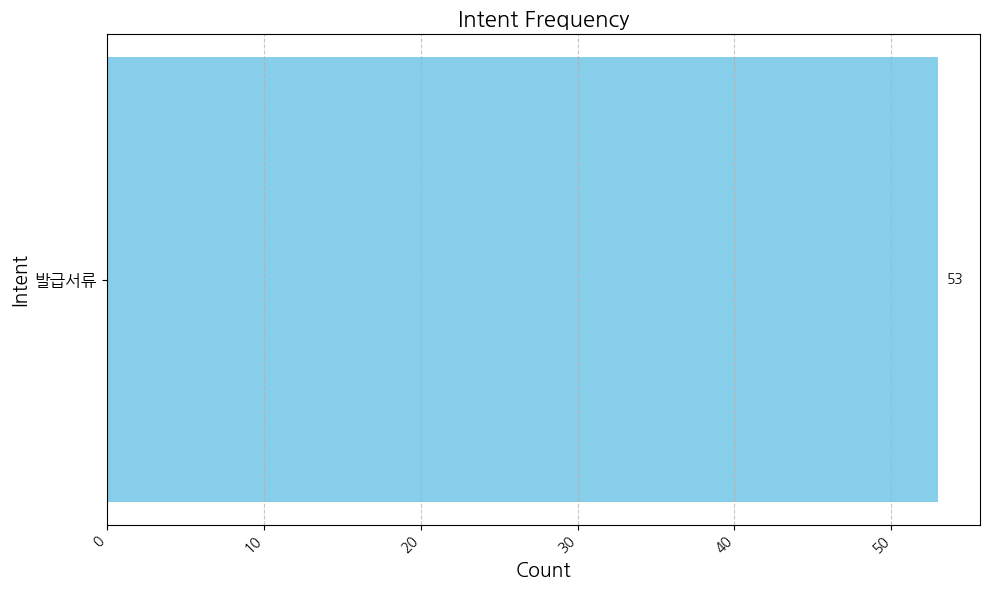

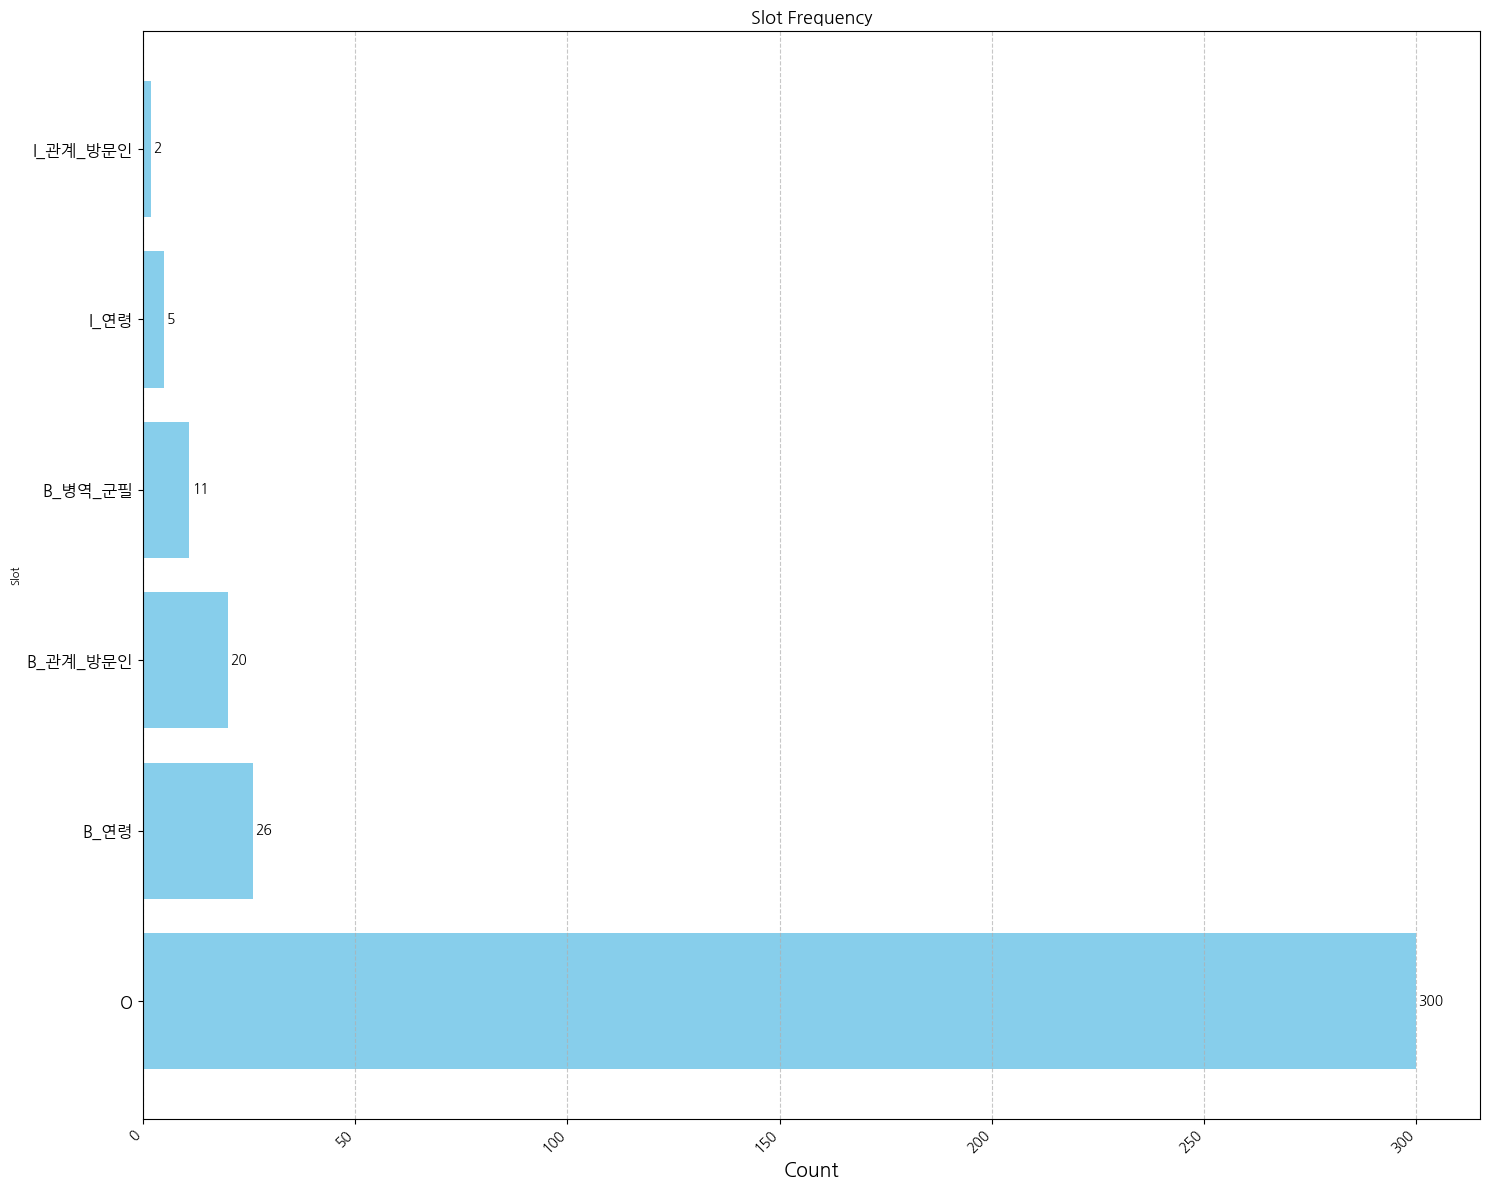

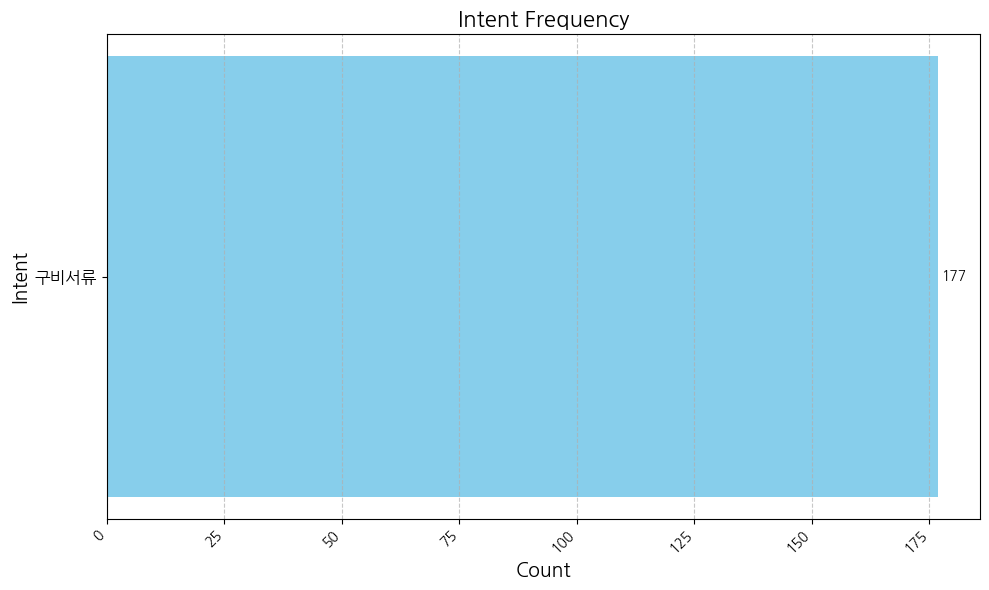

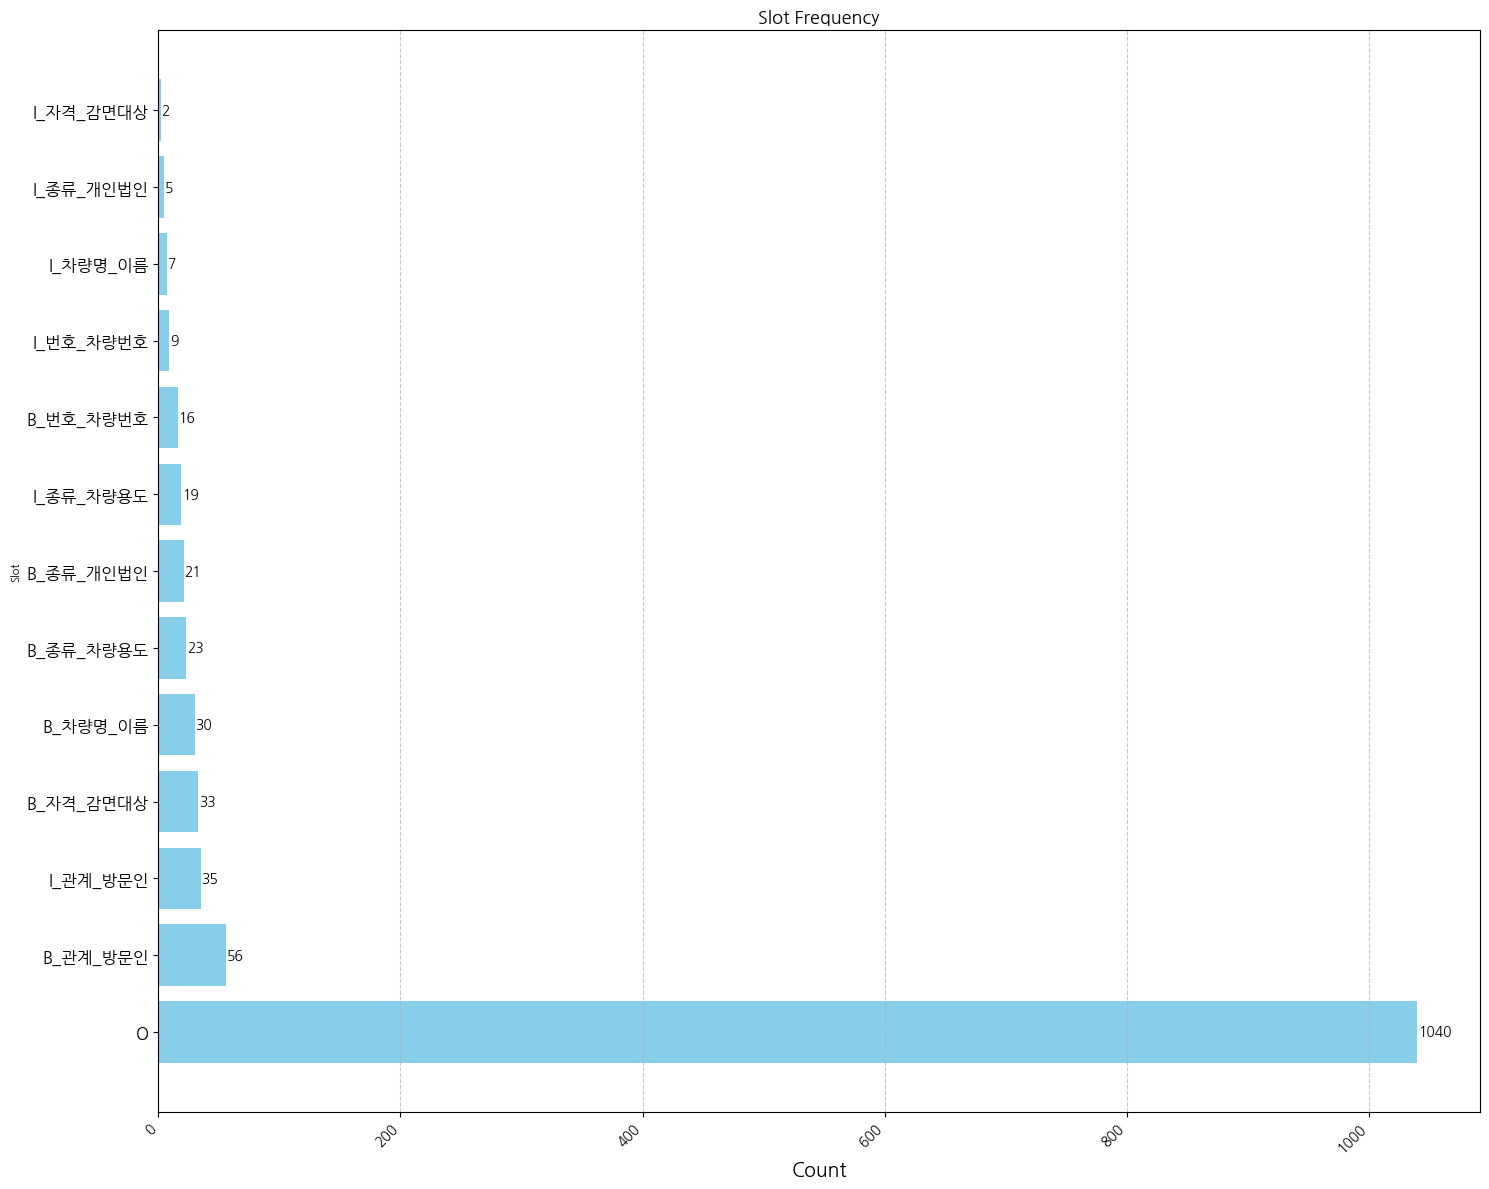

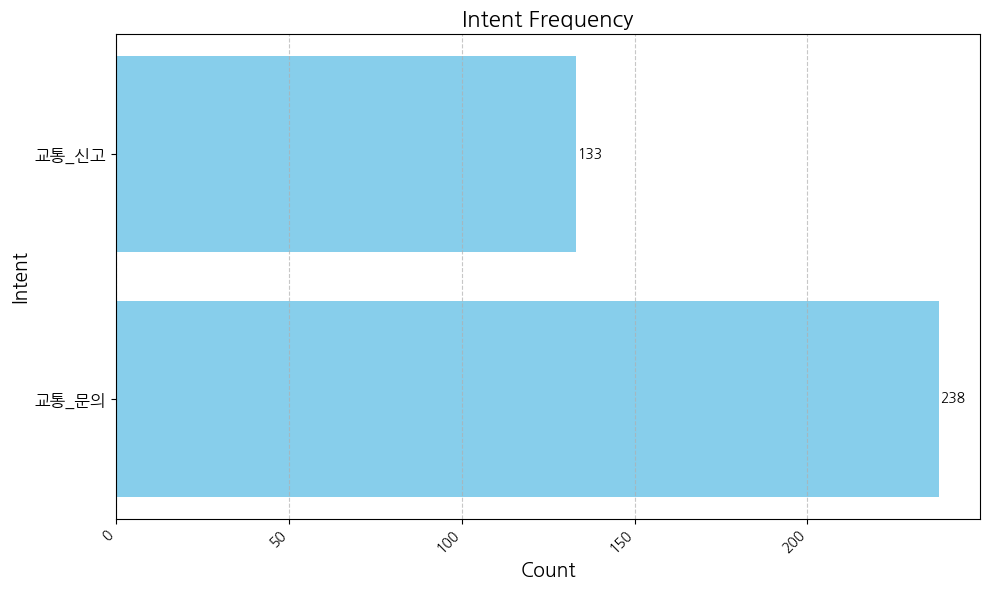

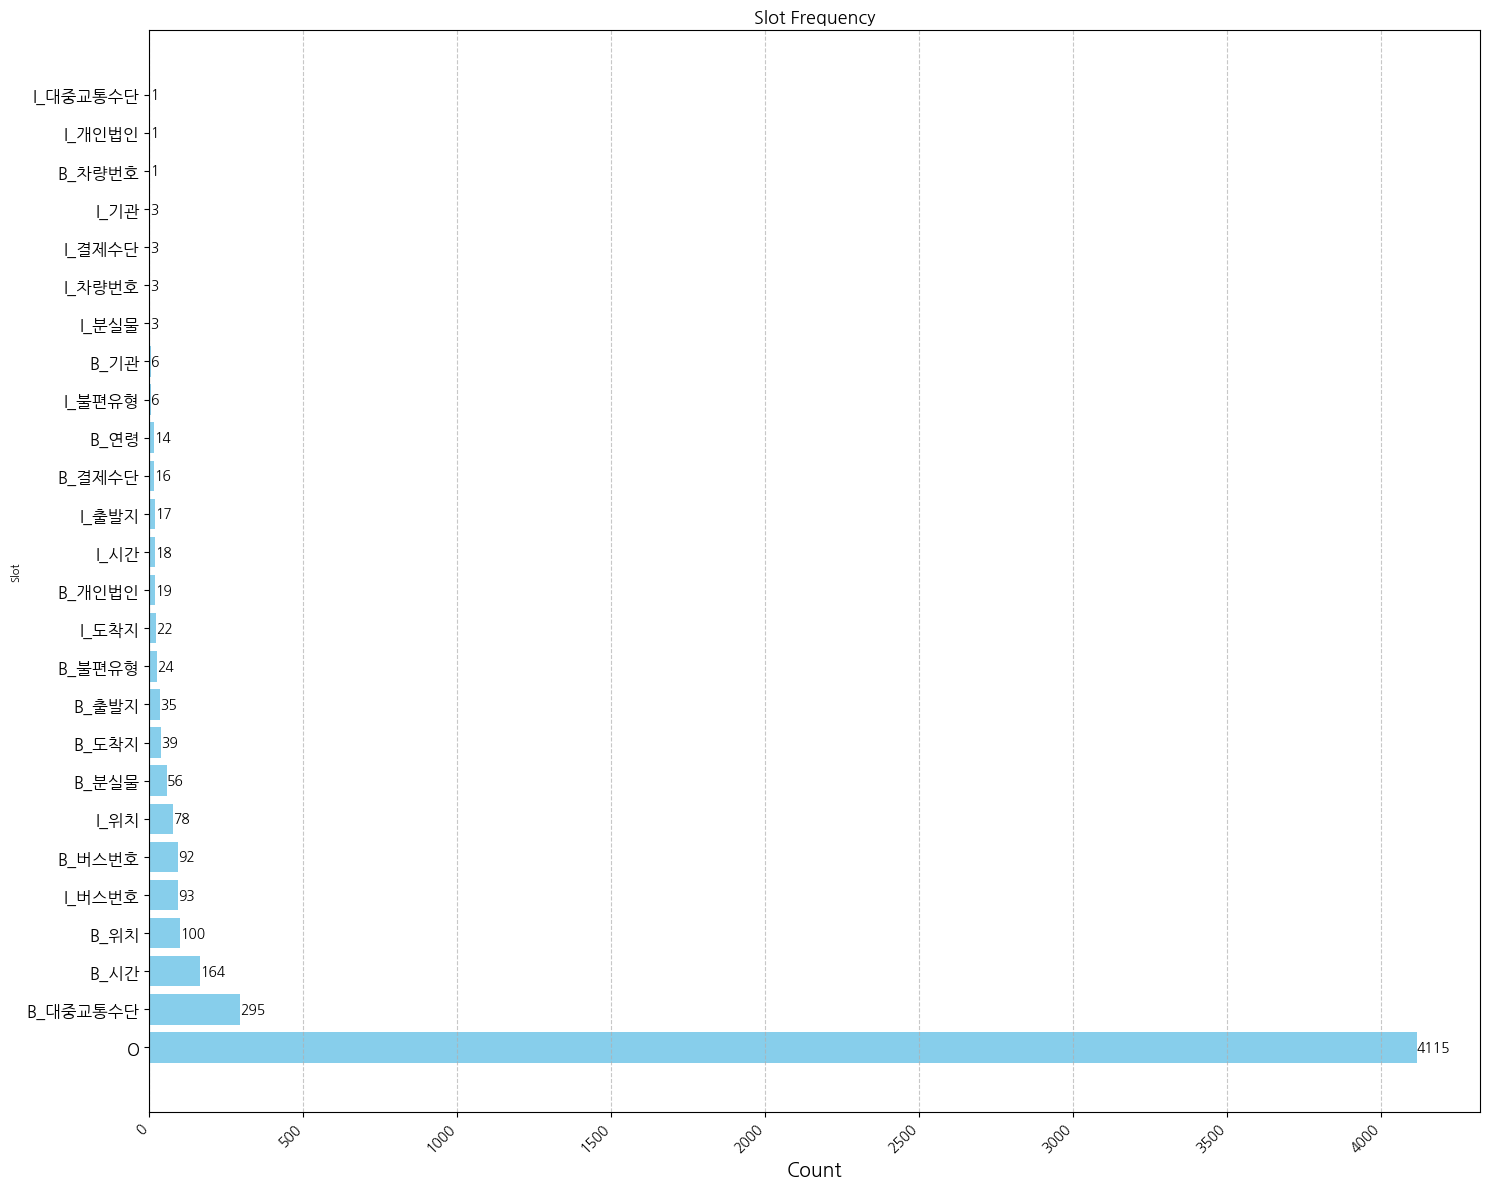

In [6]:
for i in data_list:
    data_eda(i)

In [7]:
merged_data = []

for file_name in data_list:
    file_path = os.path.join(dir_path, file_name)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        print(f"{file_name}의 데이터 수 : {len(data)}")
        merged_data.extend(data.values())

total_data_count = len(merged_data)
print(f"Total data count: {total_data_count}")

A_food.json의 데이터 수 : 2749
B_clothes.json의 데이터 수 : 2342
C_academy.json의 데이터 수 : 442
F_cafe.json의 데이터 수 : 1912
G_accomodation.json의 데이터 수 : 1167
J_passport.json의 데이터 수 : 53
J_car_register.json의 데이터 수 : 177
traffic.json의 데이터 수 : 371
Total data count: 9213


In [8]:
count = 0
for file_name in data_list:
    file_path = os.path.join(dir_path, file_name)
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        print(file_name, " : ", len(data))
        count = count + len(data)
print("total data : ", count)

A_food.json  :  2749
B_clothes.json  :  2342
C_academy.json  :  442
F_cafe.json  :  1912
G_accomodation.json  :  1167
J_passport.json  :  53
J_car_register.json  :  177
traffic.json  :  371
total data :  9213


In [9]:
import random
from collections import defaultdict

intent_dict = defaultdict(list)

# 데이터를 intent 기준으로 분류
for item in merged_data:
    intent = item['intent']
    intent_dict[intent].append(item)

# train, valid, test 데이터를 담을 리스트
train_data = []
valid_data = []
test_data = []

for intent, items in intent_dict.items():
    random.shuffle(items)
    
    train_split = int(len(items) * 0.8)
    # print(train_split)
    valid_split = int(len(items) * 0.1) + train_split
    # print(valid_split)
    
    train_data.extend(items[:train_split])
    valid_data.extend(items[train_split:valid_split])
    test_data.extend(items[valid_split:])

print(f"Total train data: {len(train_data)}")
print(f"Total valid data: {len(valid_data)}")
print(f"Total test data: {len(test_data)}")


Total train data: 7364
Total valid data: 912
Total test data: 937


In [10]:
# output_dir = os.path.join("/home/oks/oks/people/mj/[2024]OKS/DATA_eda", 'split_data')
# os.makedirs(output_dir, exist_ok=True)

# with open(os.path.join(output_dir, 'train_data.json'), 'w', encoding='utf-8') as train_file:
    # json.dump(train_data, train_file, ensure_ascii=False, indent=4)

# with open(os.path.join(output_dir, 'valid_data.json'), 'w', encoding='utf-8') as valid_file:
    # json.dump(valid_data, valid_file, ensure_ascii=False, indent=4)

# with open(os.path.join(output_dir, 'test_data.json'), 'w', encoding='utf-8') as test_file:
    # json.dump(test_data, test_file, ensure_ascii=False, indent=4)

## Total Train

In [11]:
# def merge_data(kor_data_path, amazon_path, save_name):
#     total_data = []
    
#     with open(kor_data_path, 'r', encoding='utf-8') as file:
#         ko_data = json.load(file)
#         total_data.extend(ko_data)
#     print("한국어 대화 데이터 수 : ", len(ko_data))
    
#     with open(amazon_path, 'r', encoding='utf-8') as file:
#         amazon_data = json.load(file)
#         total_data.extend(amazon_data)
#     print("Amazon massive 데이터 수 : ",len(amazon_data))
    
#     print("total_len : ", len(total_data))
#     output_dir = os.path.join(dir_path, 'total_data')
#     os.makedirs(output_dir, exist_ok=True)

#     with open(os.path.join(output_dir, save_name), 'w', encoding='utf-8') as train_file:
#         json.dump(total_data, train_file, ensure_ascii=False, indent=4)

In [12]:
# kor_data_path = "/home/oks/oks/data/intent_oks/korean/split_data/train_data.json"
# amazon_path = "/home/oks/oks/data/intent_oks/korean/Amazon_massive_kor_train_data.json"
# save_name = "total_train.json"

# merge_data(kor_data_path, amazon_path, save_name)

### DATA checking

In [13]:
import json

file_path = '/home/oks/oks/data/intent_oks/korean/split_data/test_data.json'

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

unique_slots = set()

for item in data:
    print(item['text'].split())
    print(item['slot_out'].split())
    # if len(item['text'].split()) != len(item['slot_out'].split()):
    #     print(item['text'])
    #     print(item['slot_out'])
#     slots = value['slot_out'].split()
#     unique_slots.update(slots)

# print(sorted(unique_slots))

['음료', '는', '따로', '필요없으신가요?']
['B_메뉴', 'O', 'O', 'O']
['콜라', '작은거에서', '큰거로', '변경가능한가요']
['B_음료', 'O', 'O', 'O']
['그럼', '콜라', '큰', '걸로', '바꿔주세요']
['O', 'B_음료', 'O', 'O', 'O']
['영수증', '하나', '주세요']
['O', 'B_수량', 'O']
['명함', '하나', '만', '주세요']
['O', 'B_수량', 'O', 'O']
['사이드', '메뉴', '변경되나요?']
['B_메뉴', 'I_메뉴', 'O']
['지금', '치킨', '주문', '가능한가요?']
['O', 'B_메뉴', 'O', 'O']
['한', '사람', '이에요', '어떻게', '주문', '해야', '돼요?']
['B_인원', 'I_인원', 'O', 'O', 'O', 'O', 'O']
['포테이토피자', '파티', '사이즈', '로', '주문할께요']
['B_메뉴', 'O', 'O', 'O', 'O']
['네', '도우', '는', '얇은', '것', '과', '두꺼운', '것', '중', '무엇으로', '하시겠습니까?']
['O', 'B_재료', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['국물', '없는', '거', '좋아하세요?']
['B_재료', 'O', 'O', 'O']
['치킨', '한마리', '배달하려구요']
['B_메뉴', 'O', 'O']
['혼자', '먹으려는데', '삼계탕', '괜찮아요?']
['B_인원', 'O', 'B_메뉴', 'O']
['그럼', '세트', '2번', '에', '콜라', '도', '갖다주세요']
['O', 'B_메뉴', 'I_메뉴', 'O', 'B_음료', 'O', 'O']
['네', '국수', '주실', '때', '앞접시', '도', '같이', '주세요']
['O', 'B_메뉴', 'O', 'O', 'O', 'O', 'O', 'O']
['후라이드', '한', '마리', '

In [14]:
def plot_intent_distribution(total_intent, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'):
    """
    Parameters:
    - total_intent
    Returns:
    - plot
    """
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

    intent_counts = Counter(total_intent)
    intents, counts = zip(*intent_counts.most_common())

    plt.figure(figsize=(10, 6))
    bars = plt.barh(intents, counts, color='skyblue')

    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Intent', fontsize=14)
    plt.title('Intent Frequency', fontsize=16)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()
    
def plot_slot_distribution(total_slot, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'):
    """
    Parameters:
    - total_slot
    Returns:
    - plot
    """
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

    slot_counts = Counter(total_slot)
    slots, counts = zip(*slot_counts.most_common())

    plt.figure(figsize=(35, 12))
    bars = plt.barh(slots, counts, color='skyblue')

    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Slot', fontsize=8)
    plt.title('Slot Frequency', fontsize=13)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()

In [15]:
def data_eda_new(file_name):
    dir_path = "/home/oks/oks/data/intent_oks/korean"
    file_path = os.path.join(dir_path, file_name)
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    total_intent = []
    total_slot_out = []

    for idx in data:
        intent = idx['intent']
        slot_out = idx['slot_out']
        total_intent.append(intent)
        total_slot_out.extend(slot_out.split(" "))

    plot_intent_distribution(total_intent, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
    plot_slot_distribution(total_slot_out, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
    
    return total_slot_out


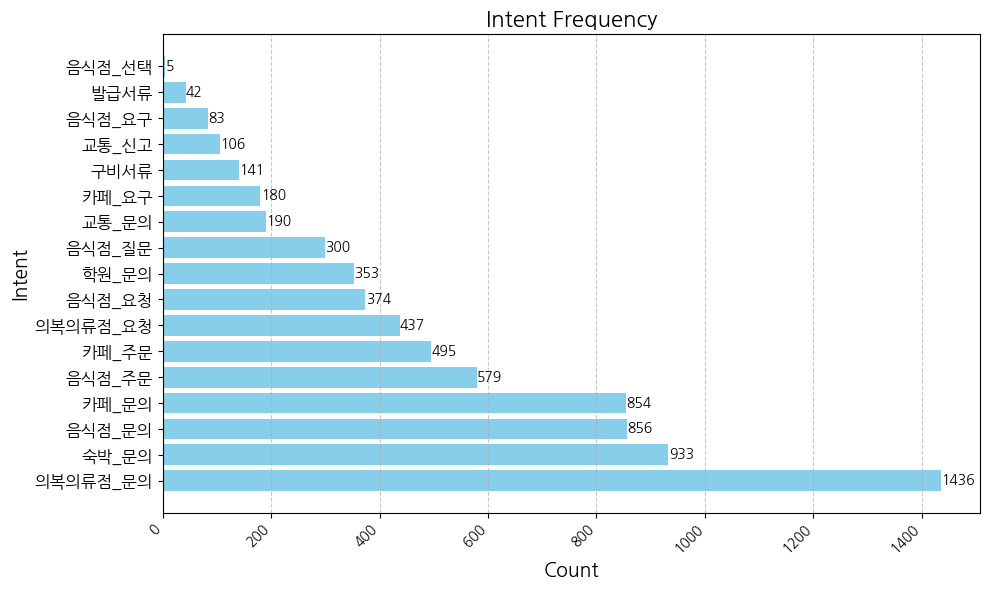

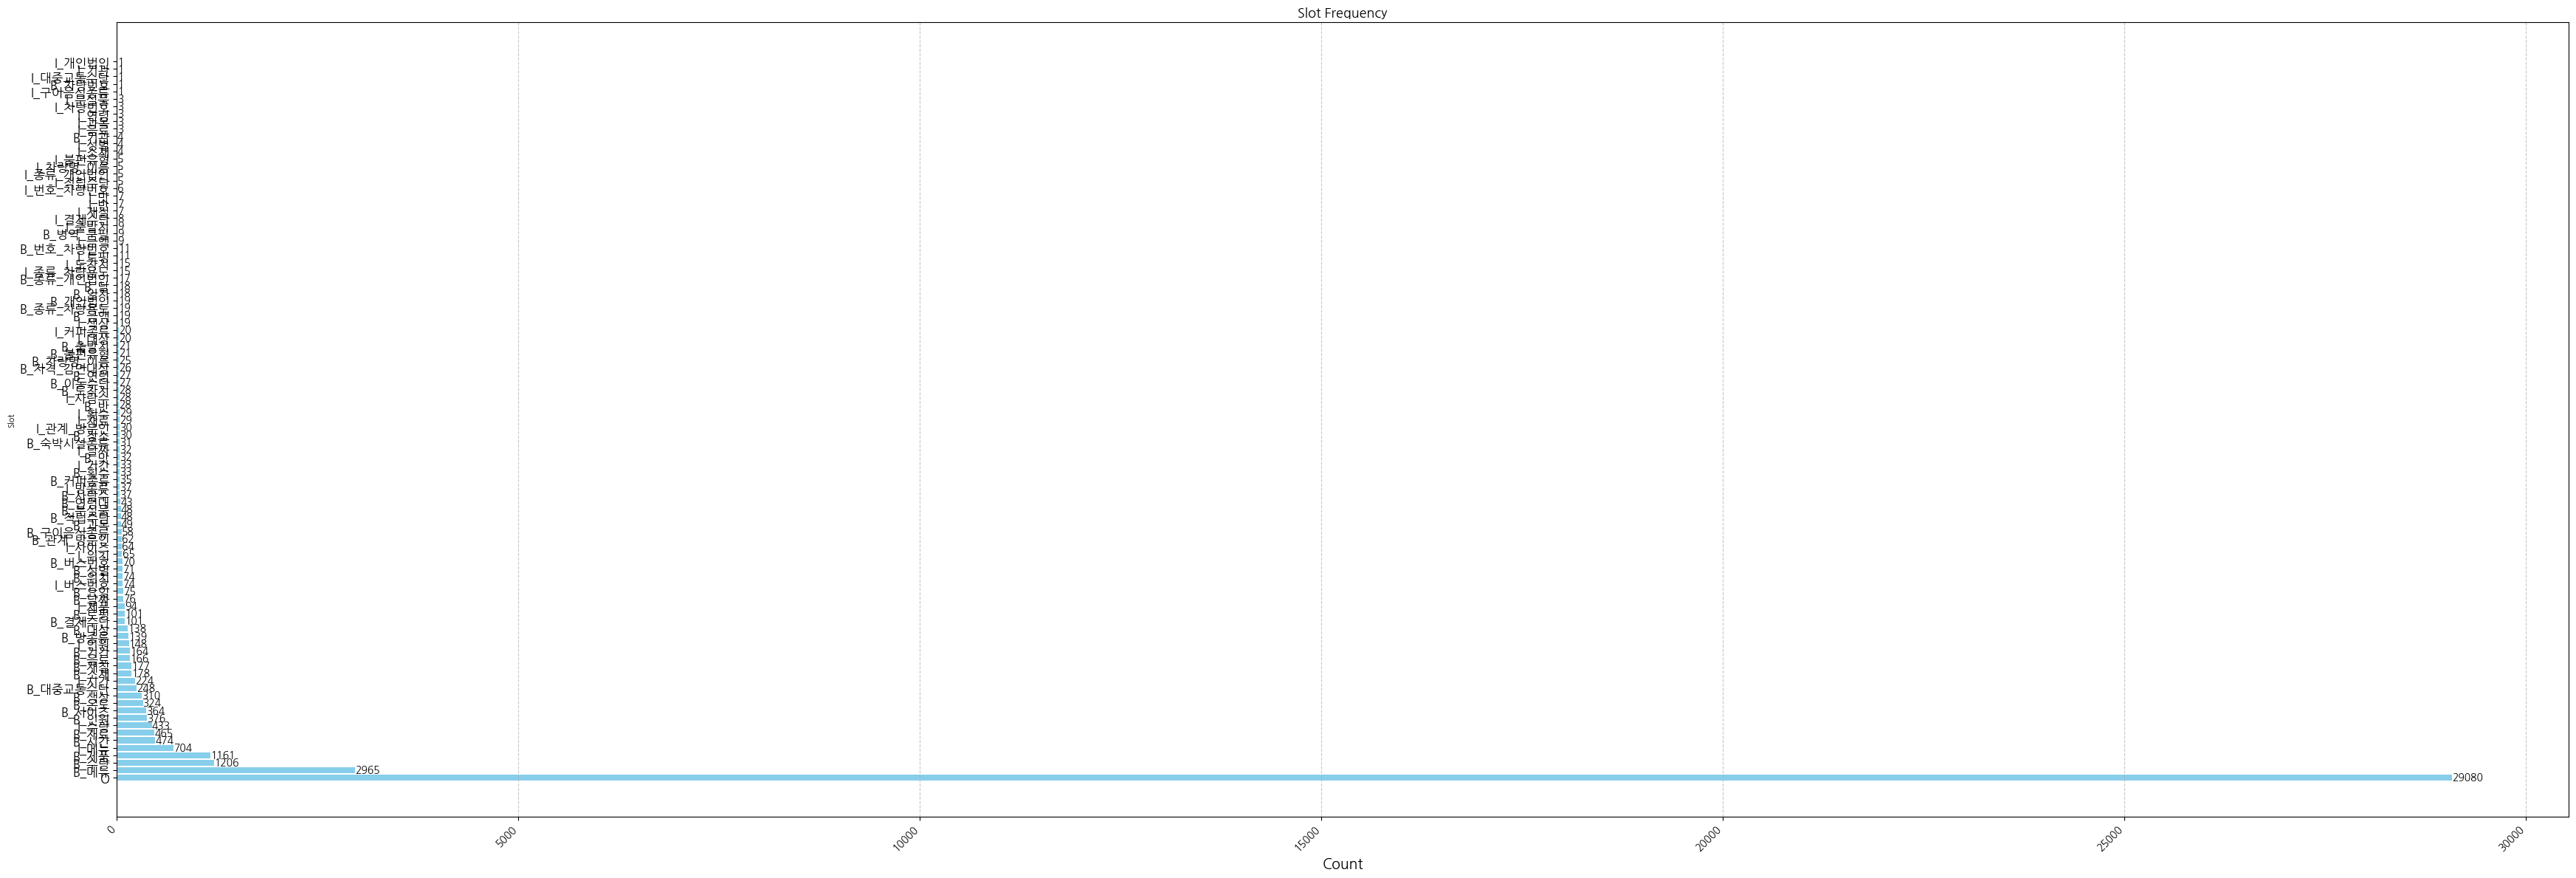

In [38]:
total_slot = data_eda_new("split_data/train_data.json")

### Amazon

In [73]:
import json

file_dir = "/home/oks/oks/data/intent_oks/korean/split_data"
file_name = "train_data.json"
file_path = os.path.join(file_dir, file_name)

def unique_slot(file_path):
    unique_slots = set()
    unique_intent = []
    
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    for item in data:
        unique_slots.update(slot.split('_', 1)[-1] for slot in item['slot_out'].split() if slot != 'O')
        unique_intent.append(item['intent'])
    return unique_slots, unique_intent

In [75]:
uniq, intent = unique_slot(file_path)

In [35]:
from collections import defaultdict

intent_slots = defaultdict(set)

intent_slots = defaultdict(set)

for entry in merged_data:
    intent = entry['intent']
    # slot_out에서 B_와 I_를 제거하고 O는 제외
    slots = {slot.split('_', 1)[-1] for slot in entry['slot_out'].split() if slot != 'O'}
    intent_slots[intent].update(slots)

# 결과 출력
for intent, slots in intent_slots.items():
    print(f"Intent: {intent}")
    print(f"Slots: {', '.join(sorted(slots))}")
    print()

Intent: 음식점_요청
Slots: 메뉴, 수량, 음료, 인원, 재료

Intent: 음식점_문의
Slots: 메뉴, 수량, 음료, 인원, 재료

Intent: 음식점_질문
Slots: 메뉴, 수량, 인원, 재료

Intent: 음식점_요구
Slots: 메뉴, 수량, 음료, 인원, 재료

Intent: 음식점_주문
Slots: 메뉴, 수량, 음료, 인원, 재료

Intent: 음식점_선택
Slots: 메뉴, 수량, 음료, 인원

Intent: 의복의류점_요청
Slots: 사이즈, 색상, 소재, 재질, 제품

Intent: 의복의류점_문의
Slots: 사이즈, 색상, 소재, 재질, 제품

Intent: 학원_문의
Slots: 과목, 기간, 대상, 반, 성별, 시간, 요일, 횟수

Intent: 카페_문의
Slots: 결제수단, 금액, 맛, 메뉴, 수량, 시간, 온도, 장소, 재료, 적립수단, 커피종류, 토핑

Intent: 카페_요구
Slots: 메뉴, 사이즈, 수량, 온도, 재료, 토핑

Intent: 카페_주문
Slots: 메뉴, 사이즈, 수량, 온도, 토핑

Intent: 숙박_문의
Slots: 결제수단, 구이음식종류, 기간, 날짜, 달, 방종류, 사람수, 수량, 숙박시설종류, 시간, 연령대, 요일, 이동수단, 인원, 일자

Intent: 발급서류
Slots: 관계_방문인, 병역_군필, 연령

Intent: 구비서류
Slots: 관계_방문인, 번호_차량번호, 자격_감면대상, 종류_개인법인, 종류_차량용도, 차량명_이름

Intent: 교통_문의
Slots: 개인법인, 결제수단, 기관, 대중교통수단, 도착지, 버스번호, 분실물, 불편유형, 시간, 연령, 위치, 차량번호, 출발지

Intent: 교통_신고
Slots: 개인법인, 결제수단, 대중교통수단, 도착지, 버스번호, 불편유형, 시간, 연령, 위치, 출발지

